In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('info.csv')
df.head(100)

,title,brand,rating,price,shipping,img_url
0,GIGABYTE GAMING OC GeForce RTX 4080 16GB GDDR6...,GIGABYTE,4.2,1269.99,Free Shipping,https://c1.neweggimages.com/ProductImageCompre...
1,GIGABYTE EAGLE OC GeForce RTX 4080 16GB GDDR6X...,GIGABYTE,4.2,1279.99,Free Shipping,https://c1.neweggimages.com/ProductImageCompre...
2,GIGABYTE GeForce RTX 3050 GAMING OC 8G Graphic...,GIGABYTE,4.8,299.99,Free Shipping,https://c1.neweggimages.com/ProductImageCompre...
3,MSI Mech Radeon RX 6500 XT 4GB GDDR6 PCI Expre...,MSI,4.2,183.99,Free Shipping,https://c1.neweggimages.com/ProductImageCompre...
4,SAPPHIRE Radeon RX 7900 XT 20GB GDDR6 PCI Expr...,Sapphire Tech,4.4,899.99,$9.99 Shipping,https://c1.neweggimages.com/ProductImageCompre...
...,...,...,...,...,...,...
95,SAPPHIRE PULSE AMD Radeon RX 6800 XT Gaming Gr...,Peladn,4.6,769.00,Free Shipping,https://c1.neweggimages.com/ProductImageCompre...
96,Peladn Gaming GeForce GTX 1650 4G Graphics Car...,ASUS,NaN,159.00,Free Shipping,https://c1.neweggimages.com/ProductImageCompre...
97,ASUS Phoenix NVIDIA GeForce RTX 3060 V2 Gaming...,MSI,4.5,389.99,Free Shipping,https://c1.neweggimages.com/ProductImageCompre...
98,MSI Gaming GeForce RTX 3060 12GB GDDR6 PCI Exp...,MSI,4.9,424.98,$49.99 Shipping,https://c1.neweggimages.com/ProductImageCompre...


In [3]:
df.describe()

,rating,price
count,1552.000000,3594.000000
mean,4.299227,663.682699
std,0.681656,614.113435
min,1.000000,15.990000
25%,4.000000,254.250000
50%,4.500000,498.000000
75%,4.700000,814.605000
max,5.000000,8648.940000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3600 entries, 0 to 3599
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   title     3600 non-null   object 
 1   brand     3419 non-null   object 
 2   rating    1552 non-null   float64
 3   price     3594 non-null   float64
 4   shipping  3598 non-null   object 
 5   img_url   3600 non-null   object 
dtypes: float64(2), object(4)
memory usage: 168.9+ KB


In [5]:
df[df['shipping'].isnull()]

,title,brand,rating,price,shipping,img_url
320,MSI Ventus GeForce RTX 3070 8GB GDDR6 PCI Expr...,MSI,4.7,NaN,NaN,https://c1.neweggimages.com/ProductImageCompre...
1259,AX Gaming New GeForce RTX 4090 X3W 24G Video C...,NaN,4.5,NaN,NaN,https://c1.neweggimages.com/ProductImageCompre...


In [6]:
df['rating'].fillna(0, inplace=True)
df['price'].fillna(df['price'].mean(), inplace=True)
df['brand'].fillna('unknow', inplace=True)
df['shipping'].fillna('unknow', inplace=True)

## 1. The companies are providing graphics cards, the number of products of each company.

In [7]:
df.groupby('brand', as_index=False).size()

,brand,size
0,51Risc,11
1,AMD,36
2,AMD Radeon Memory,1
3,AORUS,2
4,ASPIRING,2
5,ASRock,30
6,ASRock Rack,1
7,ASUS,523
8,AX Gaming,8
9,Acer America,1


## 2. Price distribution of products

In [8]:
price = df.groupby('price', as_index=False).size()
price

,price,size
0,15.99,2
1,18.70,1
2,19.38,1
3,24.99,1
4,28.13,2
...,...,...
1517,4199.97,1
1518,4894.00,1
1519,4950.00,1
1520,5290.00,1


In [9]:
price.max()

price    8648.94
size      133.00
dtype: float64

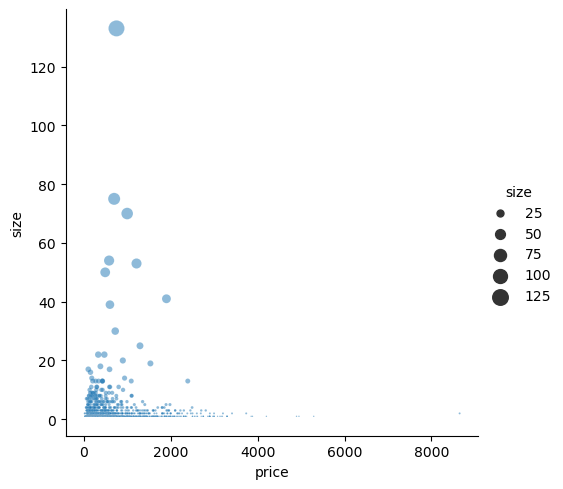

In [10]:
sns.relplot(
    data=price, x="price", y="size",
    size="size", sizes=(1, 133), alpha=0.5
)

## 3. Product price distribution by brand

<AxesSubplot:xlabel='brand', ylabel='price'>

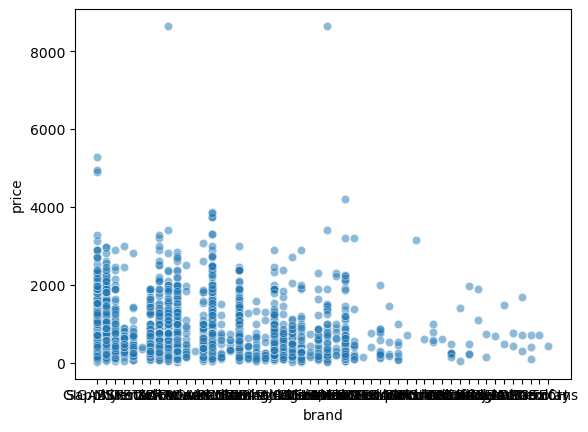

In [11]:
sns.scatterplot(data=df, x="brand", y="price", alpha=0.5)

## 4. The relationship between product price and user rating

<AxesSubplot:xlabel='rating', ylabel='price'>

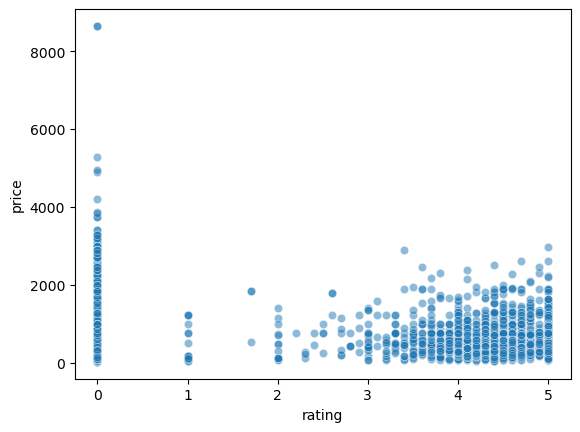

In [12]:
sns.scatterplot(data=df, x="rating", y="price", alpha=0.5)